In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
fields = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/original_fields.csv',
                     encoding='cp1251', sep=';', na_values='', decimal=',')
fields = fields.drop(columns='Unnamed: 18')

works = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/original_works.csv',
                     encoding='cp1251', sep=';', na_values='', decimal=',')

# value = pd.read_csv('value.csv', decimal=',', sep=';', na_values='', encoding='cp1251')

In [3]:
# fields = fields.drop(columns = ['Unnamed: 18'])
fields = fields.drop_duplicates()
# works = works.drop(columns = ['main_tech', 'add_tech', 'mech'])

In [4]:
fields['id'] = fields['season'].map(str)+' '+fields['field'].map(str)
works['id'] = works['season'].map(str)+' '+works['field'].map(str)

In [5]:
print(list(works['main_tech']).count('Арендованная техника'))
print(len(works))

10514
174683


In [6]:
works.isna().sum()

,0
season,0
field,0
work_type,0
work_subtype,0
start_date,0
end_date,9004
area,0
main_tech,0
add_tech,48540
mech,0


In [7]:
set(works['work_type'])

{'Внесение СЗР', 'Внесение удобрений', 'Обработка почвы', 'Сев', 'Уборка'}

In [8]:
merged_works = works.merge(fields, on='id', how='left')
merged_works

,season_x,field_x,work_type,work_subtype,start_date,end_date,area_x,main_tech,add_tech,mech,...,area_y,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,...,49.78,Кинельская 100,NaN,NaN,NaN,1.24,217.43,211.57,6.60,6.20
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,...,235.76,Девятка,РС-1,Покупные,NaN,1.53,232.65,216.06,8.80,6.75
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,...,126.62,Сузука,F1,Покупные,классическая с плугом,1.70,247.50,216.33,8.58,7.33
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,126.62,Сузука,F1,Покупные,классическая с плугом,1.70,247.50,216.33,8.58,7.33
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,235.76,Девятка,РС-1,Покупные,NaN,1.53,232.65,216.06,8.80,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174678,2024,54.17.12.029.00,Уборка,Подбор (корм),27.10.2024,27.10.2024,"27,00","Комбайн кормоуборочный Ростсельмаш F2650, гос....",NaN,Ульвачев Алексей Николаевич,...,162.17,БН 06-18,NaN,Покупные,минимальная,4.10,5.06,241.12,184.23,8.03
174679,2024,54.28.13.038.00,Уборка,Вывоз,27.10.2024,27.10.2024,"7,00","Трактор колесный Lovol 2604, зав.ном. M700060R...",Арендованная техника,Лагунов Юрий Николаевич,...,314.32,Скипетр,РС-1,Покупные,минимальная,4.00,5.72,216.26,347.81,6.27
174680,2024,54.28.07.028.00,Обработка почвы,Культивация,28.10.2024,28.10.2024,"3,14","Трактор колесный John Deere 8370R, гос.ном. 49...","Культиватор стерневой Vaderstad TopDown 500, з...",Гопаненко Владимир Владимирович,...,177.14,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
174681,2024,54.28.07.028.00,Обработка почвы,Культивация,28.10.2024,28.10.2024,"6,00","Трактор колесный John Deere 9470R, гос.ном. 48...","Культиватор стерневой Vaderstad TopDown 700, и...",Гамануха Дмитрий Владимирович,...,177.14,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00


In [9]:
df_arend = merged_works[merged_works['main_tech']=='Арендованная техника']

In [10]:
df_noarend = merged_works[merged_works['main_tech']!='Арендованная техника']

Text(0.5, 1.0, 'no_arend worktypes')

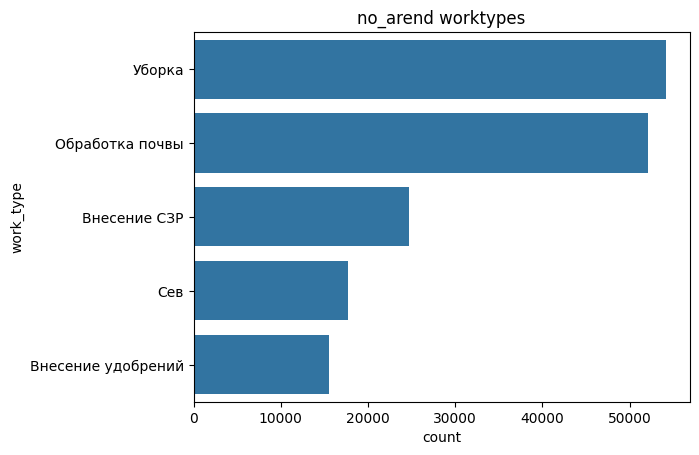

In [11]:
order = df_noarend["work_type"].value_counts().index.to_list()
sns.countplot(df_noarend['work_type'], order=order)
plt.title('no_arend worktypes')

Text(0.5, 1.0, 'arend worktipes')

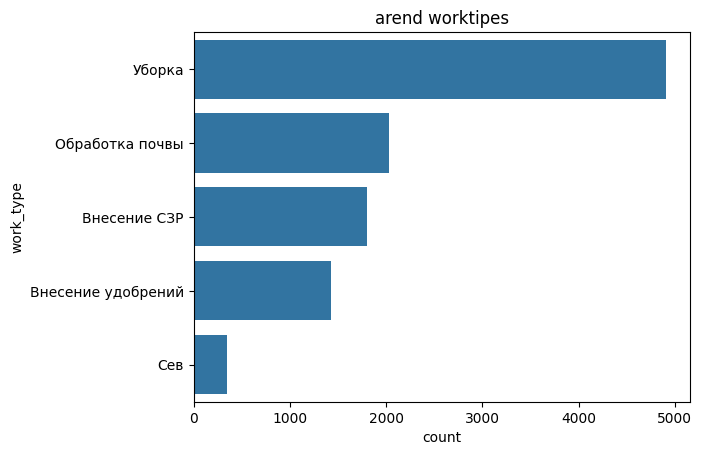

In [12]:
order = df_arend["work_type"].value_counts().index.to_list()
sns.countplot(df_arend['work_type'], order=order)
plt.title('arend worktipes')

Text(0.5, 1.0, 'arend joinplot')

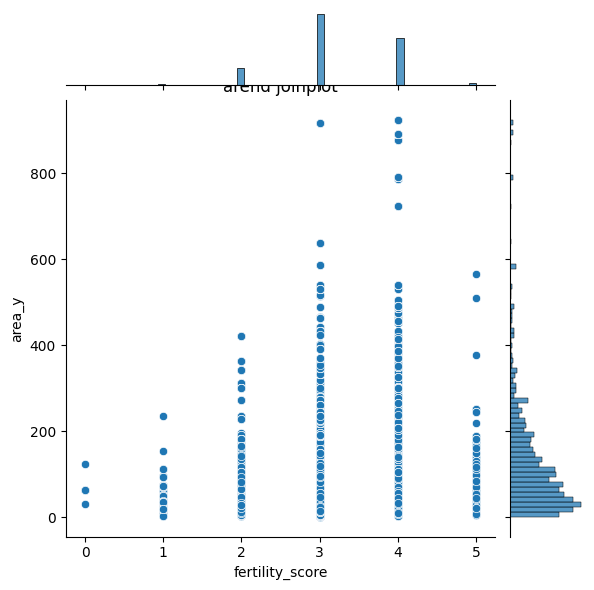

In [13]:
x = 'fertility_score'
y = 'area_y'
sns.jointplot(x = x, y = y, data=df_arend.replace({y: 0}, np.nan))

plt.title('arend joinplot')

Text(0.5, 1.0, 'no_arend worktypes')

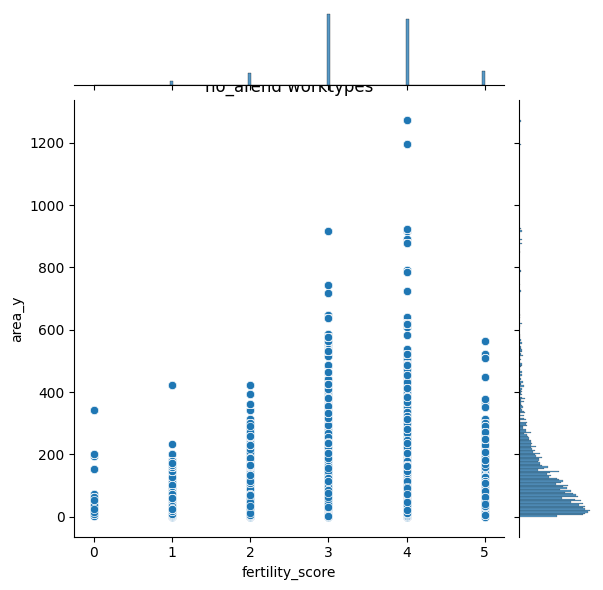

In [14]:
x = 'fertility_score'
y = 'area_y'
sns.jointplot(x = x, y = y, data=df_noarend.replace({y: 0}, np.nan))
plt.title('no_arend worktypes')

In [15]:
s = 0
sc = 0
for i in df_arend.index:
    a = float('.'.join(df_arend['area_x'][i].split(',')))
    b = df_arend['area_y'][i]
    if str(a)!='nan' and str(b)!='nan':
        s+=a/b
        sc+=1
s/len(df_arend)

0.5046650045223676

In [16]:
s = 0
sc = 0
for i in df_noarend.index:
    a = float('.'.join(df_noarend['area_x'][i].split(',')))
    b = df_noarend['area_y'][i]
    if str(a)!='nan' and str(b)!='nan':
        s+=a/b
        sc+=1
s/len(df_noarend)

0.4602922117610272

In [17]:
df_arend[['proc_depth', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'fertility_score']].mean()

,0
proc_depth,14.904117
yield_plan,4.683681
p2o5,49.134854
k2o,107.040611
humus,67.726524
ph,3.774538
fertility_score,3.231819


In [18]:
df_noarend[['proc_depth', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'fertility_score']].mean()

,0
proc_depth,12.752275
yield_plan,5.346293
p2o5,59.878328
k2o,116.752883
humus,68.550976
ph,4.665615
fertility_score,3.448185


In [19]:
merged_works.describe().T

,count,mean,std,min,25%,50%,75%,max
season_x,174683.0,2023.497455,0.499995,2023.00,2023.00,2023.00,2024.00,2024.00
proc_depth,42121.0,12.842853,36.716523,0.01,5.00,10.00,20.00,7323.00
prod_weight,174683.0,1593.576104,35510.437201,0.00,0.00,0.00,0.00,6797437.50
prod_dry_perc,12968.0,41.971009,32.466702,0.00,32.00,36.00,41.00,1655.82
prod_humid,23555.0,15.457550,93.578670,0.00,12.00,14.00,16.50,14172.00
prod_impur,23555.0,4.352716,5.879178,0.00,2.00,3.00,5.00,230.00
yield_fact,174683.0,32.732611,1146.791046,0.00,0.00,0.00,0.00,415745.40
fertility_score,160874.0,3.435073,0.834045,0.00,3.00,3.00,4.00,5.00
season_y,167057.0,2023.497088,0.499993,2023.00,2023.00,2023.00,2024.00,2024.00
crop_yearold,28795.0,2.472408,1.590947,0.00,1.00,2.00,3.00,11.00
